<a href="https://colab.research.google.com/github/martinparlanti/Portfolios/blob/main/Building_Scenarios_Price_Dynamics_for_a_Three_Stock_Portfolio_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import yfinance as yf

In [86]:
tickers = [['AAPL','JNJ','BAC']]
years = 5
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=365*years)

In [87]:
adj_close_df = pd.DataFrame()
for ticker in tickers:
  data = yf.download(ticker, start = start_date, end = end_date)
  adj_close_df[ticker] = data["Close"]
adj_close_df.head()

/tmp/ipython-input-2231183257.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start = start_date, end = end_date)
[*********************100%***********************]  3 of 3 completed


,AAPL,JNJ,BAC
Date,,,
2021-02-24,122.090347,32.241253,141.940872
2021-02-25,117.843727,31.842440,142.089249
2021-02-26,118.106705,30.761232,138.335434
2021-03-01,124.466888,31.718367,139.086166
2021-03-02,121.866318,31.487946,138.824310


In [88]:
returns = np.log(adj_close_df/adj_close_df.shift(1))
returns.dropna(inplace=True)
returns.head()

,AAPL,JNJ,BAC
Date,,,
2021-02-25,-0.035402,-0.012447,0.001045
2021-02-26,0.002229,-0.034545,-0.026774
2021-03-01,0.052451,0.030641,0.005412
2021-03-02,-0.021115,-0.007291,-0.001884
2021-03-03,-0.024760,0.024741,-0.017765


In [94]:
weights = np.array(1/len(tickers[0])*np.ones(len(tickers[0]))) # We assume each stock has the same weight of 33.3%

In [90]:
def statistical_measures(daily_returns,weights, cov_matrix):
  mean_returns = daily_returns.mean()
  standard_deviation = np.sqrt(np.dot(weights.T,np.dot(cov_matrix,weights)))

  return mean_returns, standard_deviation

cov_matrix = returns.cov()
mean_returns, standard_deviation = statistical_measures(returns, weights, cov_matrix)
print(mean_returns*100)

AAPL    0.061722
JNJ     0.039759
BAC     0.042741
dtype: float64


**Cholesky descomposition**





The program uses this decomposition to introduce a correlation structure to the assets in the portfolio. It is a mathematical technique for decomposing a symmetric positive-definite matrix as the product of a lower triangular matrix and its transpose.

In finance, Cholesky decomposition is used to generate correlated returns. The covariance matrix captures the relationships between the returns of different assets, and Cholesky decomposition allows us to extract this correlation structure.

In [95]:
sims = 100
time_range = 252
simulations = np.zeros((time_range,len(tickers[0]),sims)) # Use len(tickers[0]) for the correct number of assets

L = np.linalg.cholesky(cov_matrix)  # Cholesky matrix

In [96]:
for m in range(0,sims):
  Z = np.random.normal(size = (time_range,len(tickers[0])))
  cor_Z = Z@L.T
  sim_returns = mean_returns.values +  cor_Z

  for j in range(len(tickers[0])):
    price_series = [adj_close_df[tickers[0][j]].iloc[-1]]
    for d in range(time_range):
      next_price = price_series[-1] * np.exp(sim_returns[d,j])
      price_series.append(next_price)
    simulations[:,j,m] = price_series[1:]

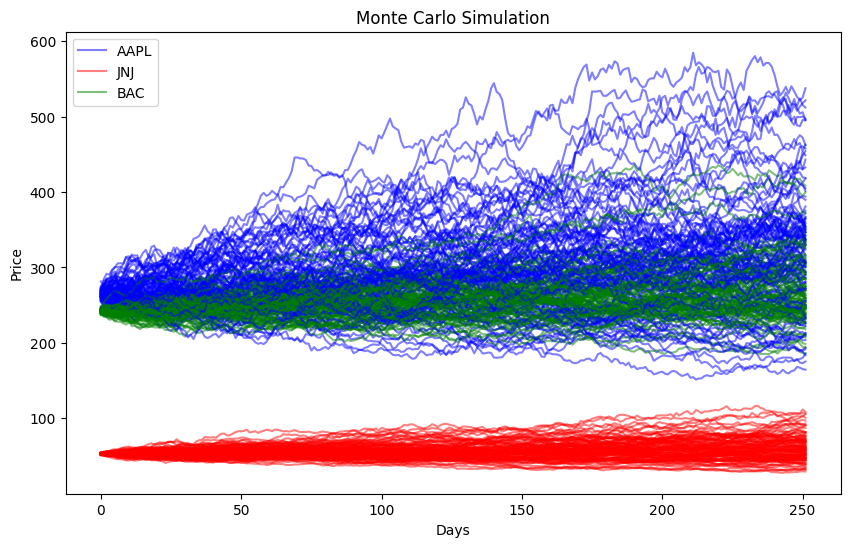

In [97]:
plt.figure(figsize=(10, 6))
for i in range(sims):
    plt.plot(simulations[:, 0, i], color='blue', alpha=0.5)
    plt.plot(simulations[:, 1, i], color='red', alpha=0.5)
    plt.plot(simulations[:, 2, i], color='green', alpha=0.5)
plt.title("Monte Carlo Simulation")
plt.xlabel("Days")
plt.ylabel("Price")
plt.gca().legend(tickers[0])
plt.show()

The plot displays 100 simulated price trajectories for each of the three assets (AAPL, JNJ, BAC) over 252 days. Each colored line represents a single simulation for a particular stock.

Key observations from this graph include:

Visualization of Uncertainty: The spread of lines for each stock clearly illustrates the inherent uncertainty and wide range of possible future price movements. This is a core purpose of Monte Carlo simulations.
Comparative Volatility: The 'width' or dispersion of the simulated paths for each stock gives an intuitive sense of its expected volatility. A wider band suggests higher risk and a broader range of potential outcomes, while a narrower band indicates lower expected volatility.
General Trends: We can observe any prevailing upward or downward trends among the simulated paths for each asset. For instance, if most blue lines (AAPL) show an upward trajectory, it suggests a higher probability of price appreciation under the model's assumptions.